In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date_result = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date = recent_date_result.date
recent_date

'2017-08-23'

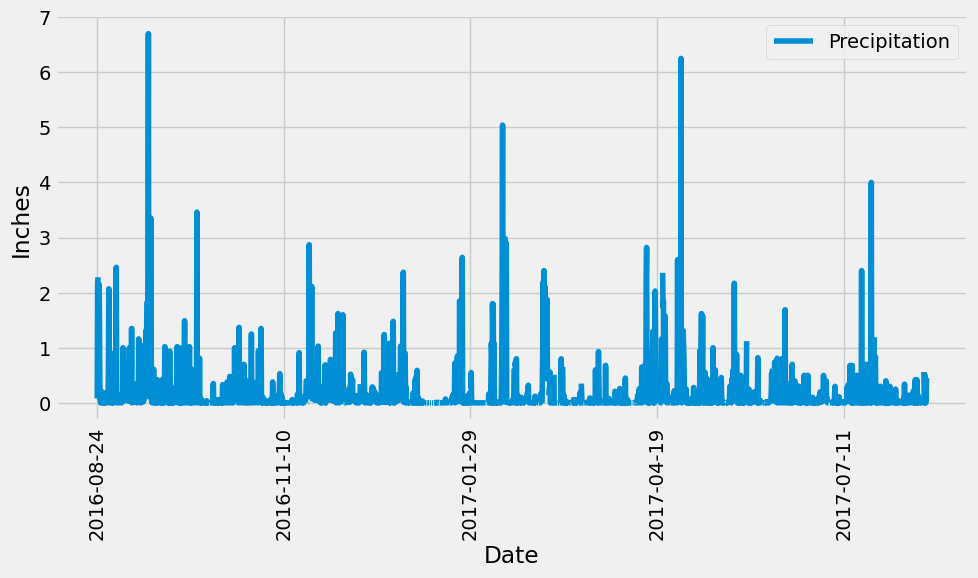

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Convert recent_date to datetime
recent_date_dt = dt.datetime.strptime(recent_date, '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
one_year_ago = recent_date_dt - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_data, columns=['date', 'precipitation'])

# Sort the dataframe by date
prcp_df.set_index('date', inplace=True)


# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize=(10, 6))
plt.ylabel('Inches')
plt.xlabel('Date')
plt.legend(['Precipitation'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

for station, count in active_stations:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]

temp_calculations = session.query(func.min(Measurement.tobs),\
                                  func.max(Measurement.tobs),\
                                    func.avg(Measurement.tobs)).filter\
                                    (Measurement.station == most_active_station).all()


min_temp, max_temp, avg_temp = temp_calculations[0]

print(f'Most active station {most_active_station}, {min_temp}, {max_temp}, {avg_temp}')
                        

Most active station USC00519281, 54.0, 85.0, 71.66378066378067


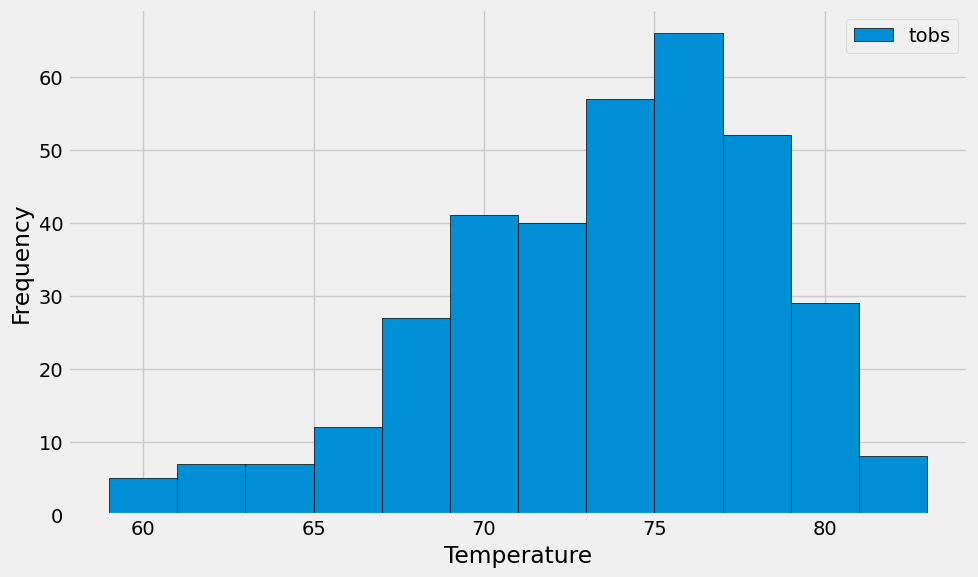

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()

# Convert the query results to a list
tobs_list = [temp[0] for temp in tobs_data]

# Plot the results 
plt.figure(figsize=(10, 6))
plt.hist(tobs_list, bins=12, edgecolor='black')
plt.xlabel('Temperature')
plt.legend(['tobs'])
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()

In [17]:
# Reflect the tables
Base.prepare(autoload_with=engine)

# Print all of the classes that automap found
print(Base.classes.keys())


['measurement', 'station']
